In [1]:
import numpy as np
import time
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Loading the YOLO pretrained model

In [2]:
#various labels that YOLO detects
labels = open('coco.names').read().strip().split("\n")

In [3]:
print(labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [4]:
print("Number of classes: ",len(labels))

Number of classes:  80


In [5]:
colors = np.random.randint(0, 255, size=(len(labels), 3), dtype="uint8")

In [6]:
# for creating the network
model = cv2.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')

# Using YOLO pretrained model for Object Detection and Tracking

In [8]:
cap = cv2.VideoCapture('video.mp4')
# out = cv2.VideoWriter('yolo_output.avi', cv2.VideoWriter_fourcc(*'MJPG'), 10, (1920, 1080)) 
frame_no = 0

while(True):
    ret, frame = cap.read()
    frame_no += 1
    
    (H, W) = frame.shape[:2]
    
    # getting the output layers
    ln = model.getLayerNames()
    ln = [ln[i[0] - 1] for i in model.getUnconnectedOutLayers()]
    
    # preparing the input image to feed into DNN
    blob = cv2.dnn.blobFromImage(frame, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    model.setInput(blob)
    
    layerOutputs = model.forward(ln)
    
    boxes = []
    confidences = []
    classIDs = []
    
    for output in layerOutputs:
        for detection in output:
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]

            if confidence > 0.5:
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")
                
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))
                
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)

    # Performing Non max supression to find the perfect bounding box
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.5)
    
    obj_detected = []
    if len(idxs) > 0:
        for i in idxs.flatten():
            x = boxes[i][0]
            y = boxes[i][1]
            w = boxes[i][2]
            h = boxes[i][3]

            color = [int(c) for c in colors[classIDs[i]]]
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            text = "{}: {:.4f}".format(labels[classIDs[i]], confidences[i])
            cv2.putText(frame, text, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
            obj_detected.append(labels[classIDs[i]])
            
    count = {}
    for label in obj_detected:
       if label in count :
          count[label] += 1
       else:
          count[label] = 1
    
    st = ''
    for key, value in count.items():
        st += str(value) + " " + str(key) + ", "
    st = st[:-2]
    
    print("Objects in frame ",frame_no," are: ",st)

    cv2.imshow("Result", frame)
#     out.write(frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()
# out.release()

Objects in frame  1  are:  12 person, 3 pottedplant, 3 car, 1 traffic light
Objects in frame  2  are:  9 person, 2 pottedplant, 3 car
Objects in frame  3  are:  12 person, 2 pottedplant, 4 car, 1 traffic light
Objects in frame  4  are:  12 person, 2 pottedplant, 3 car, 1 traffic light
Objects in frame  5  are:  9 person, 2 pottedplant, 4 car, 1 traffic light
Objects in frame  6  are:  13 person, 2 pottedplant, 3 car, 1 traffic light
Objects in frame  7  are:  11 person, 2 pottedplant, 2 car, 1 traffic light
Objects in frame  8  are:  14 person, 2 pottedplant, 1 traffic light, 2 car
Objects in frame  9  are:  13 person, 2 pottedplant, 1 car
Objects in frame  10  are:  14 person, 2 pottedplant, 1 car
Objects in frame  11  are:  13 person, 2 pottedplant, 1 car, 1 traffic light
Objects in frame  12  are:  13 person, 2 pottedplant, 2 car
Objects in frame  13  are:  14 person, 2 pottedplant, 1 car
Objects in frame  14  are:  14 person, 3 pottedplant, 1 car
Objects in frame  15  are:  12 pers

Objects in frame  118  are:  11 person, 3 car, 1 pottedplant
Objects in frame  119  are:  10 person, 3 car
Objects in frame  120  are:  13 person, 2 car
Objects in frame  121  are:  14 person, 2 car
Objects in frame  122  are:  14 person, 2 car
Objects in frame  123  are:  13 person, 2 car
Objects in frame  124  are:  14 person, 2 car
Objects in frame  125  are:  13 person, 2 car
Objects in frame  126  are:  13 person, 2 car
Objects in frame  127  are:  14 person, 2 car
Objects in frame  128  are:  13 person, 1 car, 1 pottedplant
Objects in frame  129  are:  14 person, 1 car, 1 handbag
Objects in frame  130  are:  15 person, 1 car, 1 handbag
Objects in frame  131  are:  15 person, 1 car
Objects in frame  132  are:  13 person, 1 car
Objects in frame  133  are:  12 person, 1 car
Objects in frame  134  are:  13 person, 1 car
Objects in frame  135  are:  13 person, 1 car
Objects in frame  136  are:  13 person, 1 car
Objects in frame  137  are:  14 person, 1 car
Objects in frame  138  are: 

# Sample images from the video

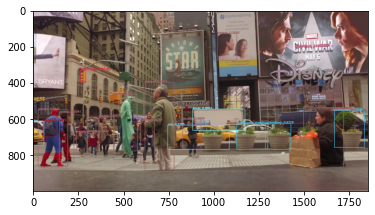

In [30]:
img = mpimg.imread('output1.png')
imgplot = plt.imshow(img)
plt.show()

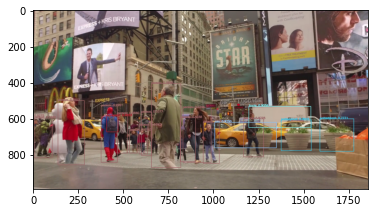

In [31]:
img = mpimg.imread('output2.png')
imgplot = plt.imshow(img)
plt.show()